## scrap/test notebook

In [30]:
import csv
import numpy as np
import os
from astropy.io import fits
from sys import argv
import matplotlib.pyplot as plt
import glob
import copy
import wget

In [82]:
directory = '/Users/mac/Desktop/LBNL/DR5/fits_cutouts/'

In [83]:
# to get files from specified folder
for i, filename in enumerate(sorted(os.listdir(directory))[1:10]):
    print(filename)

cutout_000000.fits
cutout_000001.fits
cutout_000002.fits
cutout_000003.fits
cutout_000004.fits
cutout_000005.fits
cutout_000006.fits
cutout_000007.fits
cutout_000008.fits


(3, 101, 101)
(3, 101, 101)
(3, 101, 101)
(3, 101, 101)
(3, 101, 101)
(3, 101, 101)
(3, 101, 101)
(3, 101, 101)
(3, 101, 101)


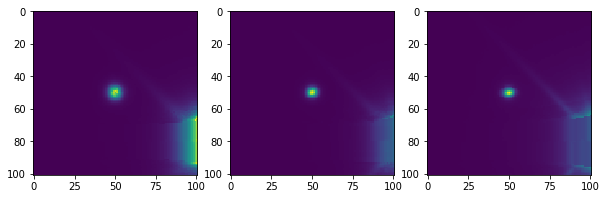

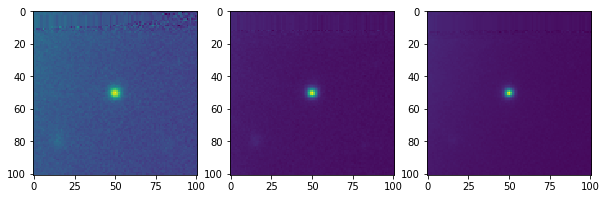

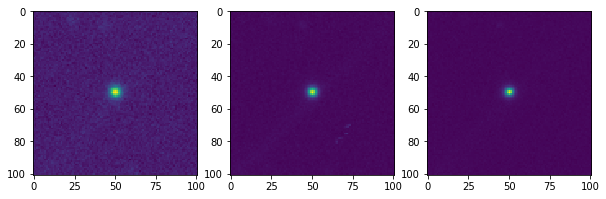

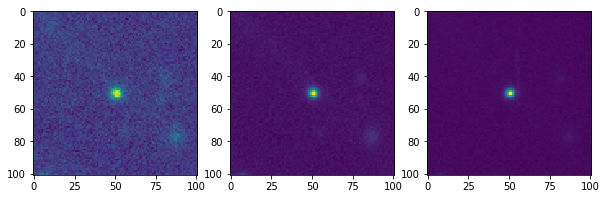

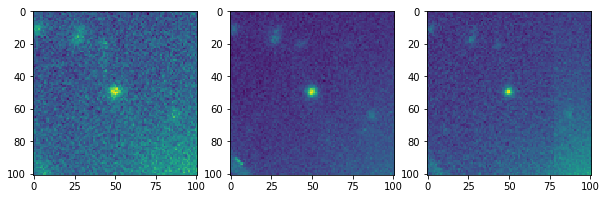

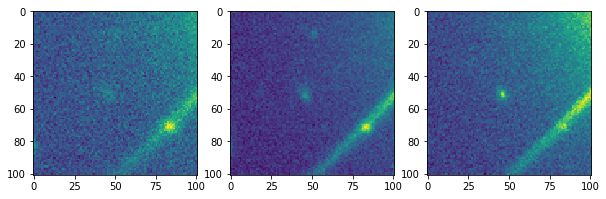

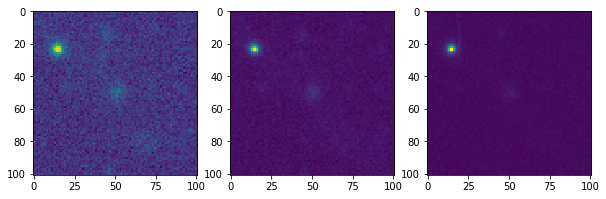

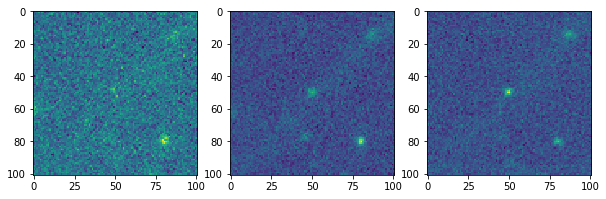

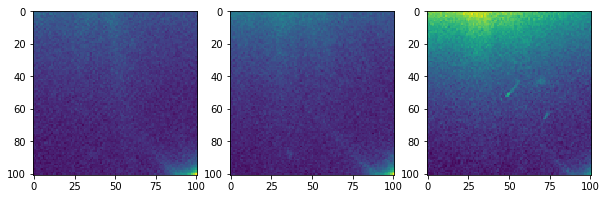

In [84]:
for i, filename in enumerate(sorted(os.listdir(directory))[1:10]):
    with fits.open(directory+filename) as filedata:
        im = filedata[0].data
        print(im.shape)
        
        plt.figure(figsize=(10,7))
        plt.subplot(131)
        plt.imshow(im[0,:,:])
        plt.subplot(132)
        plt.imshow(im[1,:,:])
        plt.subplot(133)
        plt.imshow(im[2,:,:])

In [25]:
# alternate method to get files from folder. not sure what's different
directory_ = os.fsencode(directory)
for file in sorted(os.listdir(directory_))[1:10]:
    filename = os.fsdecode(file)
    print(filename)

cutout_000000.fits
cutout_000001.fits
cutout_000002.fits
cutout_000003.fits
cutout_000004.fits
cutout_000005.fits
cutout_000006.fits
cutout_000007.fits
cutout_000008.fits


##### calculating mean/std across dataset

In [26]:
files = sorted(glob.glob('/Users/mac/Desktop/LBNL/challenge_data/GroundBasedTraining/npz/*.npz'))

In [61]:
print(len(files), 'files')
print('file[0] =', files[0])
im = np.load(files[0])['image']
print('im shape =', im.shape)

20000 files
file[0] = /Users/mac/Desktop/LBNL/challenge_data/GroundBasedTraining/npz/100000.npz
im shape = (101, 101, 4)


In [78]:
ims = np.zeros((len(files), 101, 101, 4))
for i,f in enumerate(files):
    with np.load(f) as data:
        im = data['image']
    ims[i] = im

print('ims shape =', ims.shape)
print('\nmax = {}\nmin = {}'.format(np.amax(ims), np.amin(ims)))

mask = np.where(ims == 100)
ims_masked = copy.copy(ims)
ims_masked[mask] = 0

print('\nmax (masked) = {}\nmin (masked) = {}'.format(np.amax(ims_masked), np.amin(ims_masked)))

ims shape = (20000, 101, 101, 4)

max = 100.0
min = -1.2250920278233934e-08

max (masked) = 4.683375109948429e-08
min (masked) = -1.2250920278233934e-08


In [79]:
print('UNMASKED\nmean = {}\nstd = {}'.format(np.mean(ims), np.std(ims)))
print('\nMASKED\nmean = {}\nstd = {}'.format(np.mean(ims_masked), np.std(ims_masked)))

UNMASKED
mean = 1.1923566317041112
std = 10.854213413845873

MASKED
mean = 1.6649487250414204e-12
std = 5.090208456258302e-11


In [80]:
ims_masked_clip = np.clip(ims_masked, -1e-9, 1e-9) / 1e-9
print('mean (masked clipped) = {}'.format(np.mean(ims_masked_clip)))

mean (masked clipped) = 0.0014750807392708953


In [47]:
output_filename= '/Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt'

with open(output_filename, 'r') as outfile:
    outdata = outfile.readlines()
print('outfile:')
for line in outdata:
    print(line.split(','))

startfile='new_startfile'
startobject='new_startobject'
c='new_c'
t_folder='new_t_folder'
with open(output_filename, 'a') as output_file:
    output_file.write('\n{}, {}, {}, {}'.format(startfile, startobject, c, t_folder))
    
with open(output_filename, 'r') as outfile:
    outdata = outfile.readlines()
print('\n+ appended values')
for line in outdata:
    print(line.split(','))

outfile:
['tractor-0001m002.fits', ' 0', ' 0', ' 000']

+ appended values
['tractor-0001m002.fits', ' 0', ' 0', ' 000\n']
['new_startfile', ' new_startobject', ' new_c', ' new_t_folder']


In [47]:
t_file = '/Users/mac/Desktop/LBNL/DR6/tractor_fits/tractor-2318p452.fits'
with fits.open(t_file) as fit:
    filedata = fit[1].data

In [50]:
filedata.shape[0]

3543

# delete repeat cutouts

In [27]:
# delete repeat files in cutouts folder
repeat_fits = sorted(glob.glob('/Users/mac/Desktop/LBNL/DR7/tractor_fits/*.fits'))
for f in repeat_fits:
    if '(1)' in f:
        print('removing ', f)
        os.remove(f)

removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001m002 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001m010 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001m015 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001m020 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001m025 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001p007 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001p012 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001p017 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0001p025 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0003m060 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0003m062 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0003m065 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/tractor_fits/tractor-0003m067 (1).fits

In [28]:
repeat_cutouts = sorted(glob.glob('/Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/*.fits'))
for f in repeat_cutouts:
    if '(1)' in f:
        print('removing ', f)
        os.remove(f)

removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008400 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008401 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008402 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008403 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008404 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008405 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008406 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008407 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008408 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008409 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008410 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_008411 (1).fits
removing  /Users/mac/Desktop/LBNL/DR7/fits_cutouts_dr7/cutout_00

In [51]:
tfile = '/Users/mac/Desktop/LBNL/DR6/tractor_fits/tractor-2318p452.fits'
with fits.open(tfile) as fit:
    filedata = fit[1].data

In [52]:
print(filedata.shape[0])

3543


In [58]:
print('object - ra, dec, exposures in: g, r, z')
for i in range(20):
    ra = filedata[i][6]
    dec = filedata[i][7]
    nobs_g = filedata[i][65]
    nobs_r = filedata[i][66]
    nobs_z = filedata[i][68]
    print('OBJID {}: {}, {}, {}, {}, {}'.format(i, ra, dec, nobs_g, nobs_r, nobs_z,))

object - ra, dec, exposures in: g, r, z
OBJID 0: 231.8795670132724, 45.12440453818411, 3, 4, 3
OBJID 1: 231.94355440537004, 45.12440124663016, 3, 4, 3
OBJID 2: 231.93971358787473, 45.12491067833913, 3, 4, 3
OBJID 3: 231.93597609161048, 45.124866000401745, 3, 4, 3
OBJID 4: 231.9373677550266, 45.12564497341221, 3, 4, 3
OBJID 5: 231.6799877455744, 45.12470630094474, 3, 4, 3
OBJID 6: 231.97487274560237, 45.12516700908367, 3, 4, 2
OBJID 7: 231.84412482296014, 45.12516915246787, 3, 4, 3
OBJID 8: 231.9542852269156, 45.125460289429974, 3, 4, 3
OBJID 9: 231.86646636944067, 45.12851558831776, 4, 5, 3
OBJID 10: 231.86847998623915, 45.12521309431554, 4, 5, 3
OBJID 11: 231.86709286188255, 45.12628626548774, 4, 5, 3
OBJID 12: 231.8353196997072, 45.12546090376306, 3, 4, 3
OBJID 13: 231.82462072513678, 45.12596485137559, 3, 4, 2
OBJID 14: 231.7498944026479, 45.125327831438355, 3, 4, 3
OBJID 15: 231.66335633542482, 45.1252819162992, 3, 4, 3
OBJID 16: 231.6423614042053, 45.12663891370522, 3, 3, 3
OBJID 

In [39]:
print(len(filedata[0]))

165


In [54]:
def fluxToMag(f):
    try:
        return (-2.5 * (np.log(f)/np.log(10.) - 9))
    except:
        return 'nope'

In [55]:
k = 0
for idx in range(len(filedata[k])):
    print('index {} ---- value: {} ---- mag: {}'.format(idx, filedata[k][idx], fluxToMag(filedata[k][idx])))

index 0 ---- value: 6000 ---- mag: 13.054622264007051
index 1 ---- value: 566001 ---- mag: 8.11795700376917
index 2 ---- value: 2318p452 ---- mag: nope
index 3 ---- value: 0 ---- mag: inf
index 4 ---- value: False ---- mag: inf
index 5 ---- value: REX ---- mag: nope
index 6 ---- value: 231.8795670132724 ---- mag: 16.586843798137178
index 7 ---- value: 45.12440453818411 ---- mag: 18.36397129000032
index 8 ---- value: 4638616576.0 ---- mag: -1.6659720503003816
index 9 ---- value: 9937421312.0 ---- mag: -2.493184053990407
index 10 ---- value: 1100.48583984375 ---- mag: 14.896038740752964
index 11 ---- value: 74.06974029541016 ---- mag: 17.825898059104727
index 12 ---- value: [ 645.71411133  677.9107666   676.21551514  678.60644531  653.53216553] ---- mag: [ 15.47489929  15.4220686   15.42478752  15.42095375  15.46183395]
index 13 ---- value: 0.01084539107978344 ---- mag: 27.411886821863355
index 14 ---- value: 57502.35081018666 ---- mag: 10.600786000318417
index 15 ---- value: 57920.25626

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
output_filename = '/Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt'
print('loading in parameters from {}'.format(output_filename))
with open(output_filename, 'r') as output_file:
    outdata = output_file.readlines()
# print(outdata[-1].split(',')[0], int(outdata[-1].split(',')[1]), int(outdata[-1].split(',')[2]), outdata[-1].split(',')[3])
startfile, startobject, c, t_folder = outdata[-1].split(',')[0], int(outdata[-1].split(',')[1]), int(outdata[-1].split(',')[2]), outdata[-1].split(',')[3]
print(startfile, startobject, c, t_folder)

loading in parameters from /Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt
tractor-0001m002.fits 0 0 000


In [11]:
next_start_file, next_start_object, next_c, t_folder = 'tractor-0001m002.fits', 200, 40, '000'

print('writing parameters for next run to outfile')
with open(output_filename, 'a') as output_file:
    output_file.write('\n{},{},{},{}'.format(next_start_file, next_start_object, next_c, t_folder))

writing parameters for next run to outfile


In [12]:
output_filename = '/Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt'
print('loading in parameters from {}'.format(output_filename))
with open(output_filename, 'r') as output_file:
    outdata = output_file.readlines()
# print(outdata[-1].split(',')[0], int(outdata[-1].split(',')[1]), int(outdata[-1].split(',')[2]), outdata[-1].split(',')[3])
startfile, startobject, c, t_folder = outdata[-1].split(',')[0], int(outdata[-1].split(',')[1]), int(outdata[-1].split(',')[2]), outdata[-1].split(',')[3]
print(startfile, startobject, c, t_folder)

loading in parameters from /Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt
tractor-0001m002.fits 200 40 000


In [13]:
next_start_file, next_start_object, next_c, t_folder = 'tractor-0001m002.fits', 23, 200, '000'

print('writing parameters for next run to outfile')
with open(output_filename, 'a') as output_file:
    output_file.write('\n{},{},{},{}'.format(next_start_file, next_start_object, next_c, t_folder))

writing parameters for next run to outfile


In [14]:
output_filename = '/Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt'
print('loading in parameters from {}'.format(output_filename))
with open(output_filename, 'r') as output_file:
    outdata = output_file.readlines()
# print(outdata[-1].split(',')[0], int(outdata[-1].split(',')[1]), int(outdata[-1].split(',')[2]), outdata[-1].split(',')[3])
startfile, startobject, c, t_folder = outdata[-1].split(',')[0], int(outdata[-1].split(',')[1]), int(outdata[-1].split(',')[2]), outdata[-1].split(',')[3]
print(startfile, startobject, c, t_folder)

loading in parameters from /Users/mac/Desktop/LBNL/DR7/download_fits_outfile.txt
tractor-0001m002.fits 23 200 000


In [32]:
print('\n\ndownloading Tractor files...')
t_folder = '000'
t_url = 'http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr7/tractor/{}/'.format(t_folder) # DR5 -> DR7
foldername = '/Users/mac/Desktop/LBNL/DR7/tractor_folders/tractor_' + t_folder # DR5 -> DR7
print('t_url = ', t_url)
print('foldername = ', foldername)

t_folder_file = wget.download(t_url, foldername) #, foldername
with open(t_folder_file) as wgetfile:
    wgetdata = wgetfile.read()
# os.remove(foldername)



downloading Tractor files...
t_url =  http://portal.nersc.gov/project/cosmo/data/legacysurvey/dr7/tractor/000/
foldername =  /Users/mac/Desktop/LBNL/DR7/tractor_folders/tractor_000


In [35]:
t_folder = '053'
print(t_folder)
new_t_folder = '{:03d}'.format(int(t_folder)+1)
print(new_t_folder, type(new_t_folder))

053
054 <class 'str'>
